In [1]:
import copy
import json
import time
from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms

In [2]:
import alt_models
from setup_residual_totirr import (addOne, applySGDmodel, cvSGDH,
                                   fitSGDR_Huber, getEVEInd, getNormalize,
                                   getResid, getXy, handleStd)
from util.SW_Dataset_bakeoff_totirr import SW_Dataset

## Train Linear Model on Means & STDs of AIA Images

In [3]:
root = Path("/Users/andrewrobbertz/__SOC_CODE__/_data_/SDO/")
download_dir = root / "downloads"
experiments_dir = root / "experiments"

assert download_dir.exists(), f"Download directory {download_dir} does not exist."
assert (
    experiments_dir.exists()
), f"Experiments directory {experiments_dir} does not exist."

In [4]:
data_root = experiments_dir

In [5]:
EVE_path = "%s/irradiance_30mn_14ptot.npy" % data_root
print("Loading EVE data from %s" % EVE_path)

Loading EVE data from /Users/andrewrobbertz/__SOC_CODE__/_data_/SDO/experiments/irradiance_30mn_14ptot.npy


In [6]:
# get the data
XTe, ___, ______ = getXy(EVE_path, f"{data_root}/", "test")
XTr, yTr, maskTr = getXy(EVE_path, f"{data_root}/", "train")
XVa, yVa, maskVa = getXy(EVE_path, f"{data_root}/", "val")

test 0/655
test 100/655
test 200/655
test 300/655
test 400/655
test 500/655
test 600/655
train 0/4580
train 100/4580
train 200/4580
train 300/4580
train 400/4580
train 500/4580
train 600/4580
train 700/4580
train 800/4580
train 900/4580
train 1000/4580
train 1100/4580
train 1200/4580
train 1300/4580
train 1400/4580
train 1500/4580
train 1600/4580
train 1700/4580
train 1800/4580
train 1900/4580
train 2000/4580
train 2100/4580
train 2200/4580
train 2300/4580
train 2400/4580
train 2500/4580
train 2600/4580
train 2700/4580
train 2800/4580
train 2900/4580
train 3000/4580
train 3100/4580
train 3200/4580
train 3300/4580
train 3400/4580
train 3500/4580
train 3600/4580
train 3700/4580
train 3800/4580
train 3900/4580
train 4000/4580
train 4100/4580
train 4200/4580
train 4300/4580
train 4400/4580
train 4500/4580
val 0/1308
val 100/1308
val 200/1308
val 300/1308
val 400/1308
val 500/1308
val 600/1308
val 700/1308
val 800/1308
val 900/1308
val 1000/1308
val 1100/1308
val 1200/1308
val 1300/1308


In [7]:
np.savez_compressed("%s/mean_std_feats.npz" % data_root, XTr=XTr, XVa=XVa, XTe=XTe)

In [8]:
mu, sig = getNormalize(XTr)

XTr = addOne((XTr - mu) / sig)
XVa = addOne((XVa - mu) / sig)
XTe = addOne((XTe - mu) / sig)

In [9]:
model = cvSGDH(XTr, yTr, XVa, yVa, maskVa)

CV'ing huber epsilon, regularization
a = 10e-5, eps = 1.000000 => 0.063972
a = 10e-4, eps = 1.000000 => 0.063972
a = 10e-3, eps = 1.000000 => 0.063998
a = 10e-2, eps = 1.000000 => 0.067391
a = 10e-1, eps = 1.000000 => 0.144655
a = 10e0, eps = 1.000000 => 0.864759
a = 10e-5, eps = 0.500000 => 0.071665


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e-4, eps = 0.500000 => 0.071670
a = 10e-3, eps = 0.500000 => 0.071750
a = 10e-2, eps = 0.500000 => 0.075035
a = 10e-1, eps = 0.500000 => 0.512213
a = 10e0, eps = 0.500000 => 0.932065
a = 10e-5, eps = 0.333333 => 0.094062
a = 10e-4, eps = 0.333333 => 0.094711
a = 10e-3, eps = 0.333333 => 0.101543
a = 10e-2, eps = 0.333333 => 0.185633


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e-1, eps = 0.333333 => 0.655588
a = 10e0, eps = 0.333333 => 0.954615
a = 10e-5, eps = 0.250000 => 0.288858
a = 10e-4, eps = 0.250000 => 0.289696
a = 10e-3, eps = 0.250000 => 0.297992
a = 10e-2, eps = 0.250000 => 0.373365
a = 10e-1, eps = 0.250000 => 0.727341
a = 10e0, eps = 0.250000 => 0.965936
a = 10e-5, eps = 0.200000 => 0.418609


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e-4, eps = 0.200000 => 0.419275
a = 10e-3, eps = 0.200000 => 0.425873
a = 10e-2, eps = 0.200000 => 0.486091
a = 10e-1, eps = 0.200000 => 0.771690
a = 10e0, eps = 0.200000 => 0.972749
a = 10e-5, eps = 0.166667 => 0.504906
a = 10e-4, eps = 0.166667 => 0.505460
a = 10e-3, eps = 0.166667 => 0.510955
a = 10e-2, eps = 0.166667 => 0.561201


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e-1, eps = 0.166667 => 0.809930
a = 10e0, eps = 0.166667 => 0.977291
a = 10e-5, eps = 0.142857 => 0.566455
a = 10e-4, eps = 0.142857 => 0.566932
a = 10e-3, eps = 0.142857 => 0.571660
a = 10e-2, eps = 0.142857 => 0.614852
a = 10e-1, eps = 0.142857 => 0.837069
a = 10e0, eps = 0.142857 => 0.980535
a = 10e-5, eps = 0.125000 => 0.612619


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e-4, eps = 0.125000 => 0.613037
a = 10e-3, eps = 0.125000 => 0.617179
a = 10e-2, eps = 0.125000 => 0.655003
a = 10e-1, eps = 0.125000 => 0.857399
a = 10e0, eps = 0.125000 => 0.982968
a = 10e-5, eps = 0.111111 => 0.648438
a = 10e-4, eps = 0.111111 => 0.648810
a = 10e-3, eps = 0.111111 => 0.652497
a = 10e-2, eps = 0.111111 => 0.686178


/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_totirr.py:105: RuntimeWarning: divide by zero encountered in divide
  resid = resid / np.abs(y)
/Users/andrewrobbertz/__SOC_CODE__/ROSES_ML/virtual-eve/canonical_code/setup_residual_toti

a = 10e-1, eps = 0.111111 => 0.873212
a = 10e0, eps = 0.111111 => 0.984860
Best a = 10e-4, eps = 1.000000


In [10]:
# Predictions = X*W'
yTrp = np.dot(XTr, model.T)
yVap = np.dot(XVa, model.T)
yTep = np.dot(XTe, model.T)

In [11]:
# these are the new targets
diffTr = yTr - yTrp
diffTr[maskTr] = 0
diffVa = yVa - yVap
diffVa[maskVa] = 0

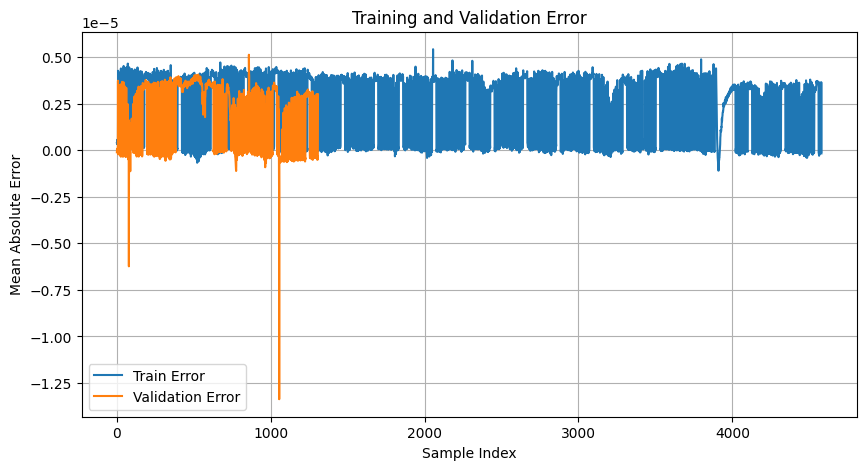

In [12]:
train_error = np.mean(diffTr, axis=1)
val_error = np.mean(diffVa, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_error, label="Train Error")
plt.plot(val_error, label="Validation Error")
plt.xlabel("Sample Index")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Validation Error")
plt.legend()
plt.grid()
plt.show()

In [13]:
print("Train Error: Mean = %.7f, Std = %.7f" % (train_error.mean(), train_error.std()))
print("Validation Error: Mean = %.7f, Std = %.7f" % (val_error.mean(), val_error.std()))

Train Error: Mean = 0.0000010, Std = 0.0000016
Validation Error: Mean = 0.0000010, Std = 0.0000018


In [14]:
# update EVE
EVE = np.load(EVE_path)
updates = [("train", diffTr), ("val", diffVa)]
for phaseName, newVals in updates:
    yind, xind = getEVEInd(f"{data_root}/", phaseName)
    for yii, yi in enumerate(yind):
        EVE[yi, xind] = newVals[yii, :]

# new statistics
residualMean = np.mean(diffTr, axis=0)
residualStd = np.std(diffTr, axis=0)

np.save("%s/eve_residual_mean_14ptot.npy" % data_root, residualMean)
np.save("%s/eve_residual_std_14ptot.npy" % data_root, residualStd)

# rescale targets
EVE *= 100

# Save the new target and the model
np.save("%s/irradiance_30mn_residual_14ptot.npy" % data_root, EVE)
np.savez_compressed(
    "%s/residual_initial_model.npz" % data_root, model=model, mu=mu, sig=sig
)

## Train Convolutional Model

In [15]:
config_dir = Path.cwd().parent / "config"
assert config_dir.exists(), f"Config directory {config_dir} does not exist."

# Get the first JSON config file in the directory
config_file = list(config_dir.glob("*.json"))[0]

cfg = {}
with open(config_file, "r") as f:
    cfg = json.load(f)

cfg

{'shuffle': True,
 'lr_start': 0.1,
 'lr_step_size': 8,
 'lr_gamma': 0.1,
 'crop': True,
 'seed': 1,
 'num_epochs': 24,
 'in_resolution': 224,
 'eve_sigmoid': False,
 'zscore': False,
 'weight_decay': 1e-09,
 'async_loading': True,
 'resume_from': 'checkpoint.pth.tar',
 'num_eve_channels': 14,
 'to_train': True,
 'dataloader_workers': 4,
 'aia_channels': 9,
 'resume': True,
 'dropout': True,
 'pin_memory': True,
 'input_shape': {'channels': 9, 'width': 224, 'height': 224},
 'batch_size': 32,
 'to_test': False,
 'arch': 'anet_3_bn',
 'experiment_dir_root': '/data/NASAFDL2018/SpaceWeather/Team1-Meng/bakeoff1_results',
 'loss': 'L1',
 'test_every': 20,
 'flip': True,
 'data_csv_dir': '/scratch/AIA_2011_224',
 'cuda': True,
 'eve_transform': 'sqrt'}

In [ ]:
target_path = (
    data_root / f"results_{config_file.stem}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
)
target_path.mkdir(parents=True, exist_ok=True)

In [17]:
model_file = target_path / f"{config_file.stem}_model.pt"
log_file = target_path / f"{config_file.stem}_log.txt"

In [18]:
print(cfg["arch"], cfg["dropout"])

anet_3_bn True


In [19]:
_, layer_count, bn = cfg["arch"].split("_")
sw_net = alt_models.ChoppedAlexnetBN(
    numLayers=layer_count, outSize=15, dropout=cfg["dropout"]
)

In [20]:
type(sw_net)

alt_models.ChoppedAlexnetBN

In [21]:
import torch.nn as nn

isinstance(sw_net, nn.Module)

True

In [22]:
# Check if MPS is available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Move model to the device
sw_net = sw_net.to(device)

# For future tensor operations, remember to create or move tensors to this device
# Example: x = torch.randn(3, 3, device=device)

Using device: mps


In [23]:
print(cfg["loss"])
criterion = None
if cfg["loss"] == "L2":
    criterion = nn.MSELoss()
elif cfg["loss"] == "L1":
    criterion = nn.SmoothL1Loss()

L1


In [24]:
# Load the EVE Data
EVE_path = data_root / "irradiance_30mn_residual_14ptot.npy"
assert EVE_path.exists(), f"EVE data file {EVE_path} does not exist."

In [25]:
crop = cfg["crop"]
flip = cfg["flip"]
zscore = cfg["zscore"]
print(f"Using crop: {crop}")
print(f"Using flip: {flip}")
print(f"Using zscore: {zscore}")

Using crop: True
Using flip: True
Using zscore: False


In [26]:
if zscore:  # we apply whatever scaling if zscore is on
    aia_mean = np.load(data_root / "aia_sqrt_mean.npy")
    aia_std = np.load(data_root / "aia_sqrt_std.npy")
    aia_transform = transforms.Compose(
        [transforms.Normalize(tuple(aia_mean), tuple(aia_std))]
    )
else:  # we don't sqrt and just divide by the means. just need to trick the transform
    aia_mean = np.load(data_root / "aia_mean.npy")
    aia_std = np.load(data_root / "aia_std.npy")
    aia_transform = transforms.Compose(
        [transforms.Normalize(tuple(aia_mean), tuple(aia_std))]
    )

In [27]:
batch_size = 64
resolution = 256
crop_res = 240

# Dataset & Dataloader for train and validation
sw_datasets = {
    x: SW_Dataset(
        EVE_path=EVE_path,
        AIA_root=str(data_root / "AIA") + "/",
        index_file=str(data_root) + "/",
        resolution=resolution,
        EVE_scale=cfg["eve_transform"],
        EVE_sigmoid=cfg["eve_sigmoid"],
        split=x,
        AIA_transform=aia_transform,
        flip=flip,
        crop=crop,
        crop_res=crop_res,
        zscore=zscore,
        self_mean_normalize=True,
    )
    for x in ["train", "val"]
}

Loaded train Dataset with 4580 examples
Loaded val Dataset with 1308 examples


In [28]:
sw_dataloaders = {
    x: torch.utils.data.DataLoader(
        sw_datasets[x], batch_size=batch_size, shuffle=True, num_workers=8
    )
    for x in ["train", "val"]
}

dataset_sizes = {x: len(sw_datasets[x]) for x in ["train", "val"]}
print(f"Dataset sizes: {dataset_sizes}")

Dataset sizes: {'train': 4580, 'val': 1308}


In [29]:
example_x, example_y = sw_datasets["train"][0]
print(f"Example X shape: {example_x.shape}")  # Should be (9, 240, 240) for AIA channels
print(f"Example Y shape: {example_y.shape}")  # Should be (15,) for EVE channels

Example X shape: torch.Size([9, 240, 240])
Example Y shape: torch.Size([15])


In [30]:
# Config Training Optimization Parameters
initLR, stepSize = cfg["lr_start"], cfg["lr_step_size"]
weightDecay = cfg["weight_decay"]
n_epochs = stepSize * 3
print(
    f"Initial Learning Rate: {initLR}, Step Size: {stepSize}, Weight Decay: {weightDecay}, Number of Epochs: {n_epochs}"
)

Initial Learning Rate: 0.1, Step Size: 8, Weight Decay: 1e-09, Number of Epochs: 24


In [31]:
# Set up Optimizer and Scheduler
optimizer = optim.SGD(
    sw_net.parameters(),
    lr=initLR,
    momentum=0.9,
    nesterov=True,
    weight_decay=weightDecay,
)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=stepSize, gamma=0.1)

In [32]:
# TRAIN MODEL
model = sw_net
scheduler = exp_lr_scheduler

training_time = time.time()

best_weights = copy.deepcopy(model.state_dict())
train_loss_list = []
val_loss_list = []

for epoch in range(n_epochs):
    print("Epoch %f / %f" % (epoch, n_epochs - 1))
    for phase in ["train", "val"]:
        # set the model in training or evaluation state
        if phase == "train":
            scheduler.step()
            model.train()
        else:
            model.eval()

        running_loss = 0
        running_count = 0

        phase_losses = []
        for batchI, (inputs, labels) in enumerate(sw_dataloaders[phase]):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward  track only for train phase
            with torch.set_grad_enabled(phase == "train"):
                outputs = model(inputs)
                loss = criterion(outputs, labels)

            # backward + optimize if in training phase
            if phase == "train":
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
                optimizer.step()

            # record loss statistics
            running_loss += loss.item() * inputs.size(0)
            running_count += inputs.size(0)
            phase_losses.append(loss.item())

            # print Batch statistics
            if batchI % 20 == 0:
                print("%06d/%06d" % (batchI, len(sw_dataloaders[phase])), end="")
                print(
                    "   Mean: %8.5f P25: %8.5f Median: %8.5f P75: %8.5f Max: %8.5f"
                    % (
                        sum(phase_losses) / len(phase_losses),
                        np.percentile(phase_losses, 25),
                        np.median(phase_losses),
                        np.percentile(phase_losses, 75),
                        max(phase_losses),
                    )
                )

        # Sum Epoch Loss
        epoch_loss = running_loss / dataset_sizes[phase]
        print("%s loss = %f" % (phase, epoch_loss))
        if phase == "train":
            train_loss_list.append(epoch_loss)
        else:
            val_loss_list.append(epoch_loss)

        # take first loss as reference at first epoch
        if phase == "val" and epoch == 0:
            worst_loss = epoch_loss

        # keep track of best weights if model improves on validation set
        if phase == "val" and epoch_loss < worst_loss:
            best_weights = copy.deepcopy(model.state_dict())
            worst_loss = epoch_loss

# load best weights into model
model.load_state_dict(best_weights)
train_loss = np.asarray(train_loss_list)
val_loss = np.asarray(val_loss_list)

training_time = time.time() - training_time
print("Training complete in %.0f minutes" % (training_time / 60))

Epoch 0.000000 / 23.000000


/opt/homebrew/Caskroom/miniforge/base/envs/roses/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:182: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


000000/000072   Mean:  4.47234 P25:  4.47234 Median:  4.47234 P75:  4.47234 Max:  4.47234
000020/000072   Mean:  5.48626 P25:  4.47234 Median:  5.43810 P75:  6.20741 Max:  8.74019
000040/000072   Mean:  5.57179 P25:  4.78224 Median:  5.60109 P75:  6.24314 Max:  8.74019
000060/000072   Mean:  5.67808 P25:  4.90792 Median:  5.81997 P75:  6.24314 Max:  8.92015
train loss = 27.846121
000000/000021   Mean:  8.96296 P25:  8.96296 Median:  8.96296 P75:  8.96296 Max:  8.96296
000020/000021   Mean:  8.84006 P25:  8.21336 Median:  8.89629 P75:  9.49923 Max: 11.19243
val loss = 8.857313
Epoch 1.000000 / 23.000000
000000/000072   Mean:  6.30101 P25:  6.30101 Median:  6.30101 P75:  6.30101 Max:  6.30101
000020/000072   Mean: 81.12267 P25:  5.21315 Median:  6.01288 P75:  6.50227 Max: 1588.90344
000040/000072   Mean: 44.34829 P25:  5.18544 Median:  5.91617 P75:  6.50227 Max: 1588.90344
000060/000072   Mean: 31.69126 P25:  5.08655 Median:  5.84041 P75:  6.50227 Max: 1588.90344
train loss = 27.813602
0

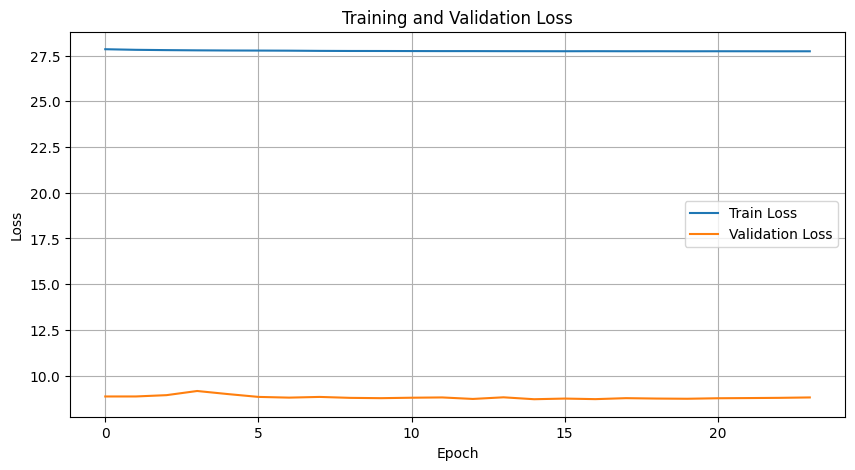

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid()
plt.show()

In [35]:
### save net, losses and info in corresponding net directory
torch.save(model, model_file)

np.save(target_path / "train_loss.npy", train_loss)
np.save(target_path / "val_loss.npy", val_loss)

In [36]:
net_name = config_file.stem

F = open(log_file, "w")

F.write("Info and hyperparameters for " + net_name + "\n")
F.write("Loss : " + str(criterion) + "\n")
F.write("Optimizer : " + str(optimizer) + "\n")
F.write(
    "Scheduler : "
    + str(exp_lr_scheduler)
    + ", step_size : "
    + str(exp_lr_scheduler.step_size)
    + ", gamma : "
    + str(exp_lr_scheduler.gamma)
    + "\n"
)
F.write("Number of epochs : " + str(n_epochs) + "\n")
F.write("Batch size : " + str(batch_size) + "\n")
F.write("Image resolution :" + str(resolution) + "\n")
F.write("Training time : " + str(training_time) + "s")
F.write("Net architecture : \n" + str(sw_net))
F.close()